# Importing and manipulating data with Pandas
An initial analysis of AirBnB listings in Brussels.

In [1]:
# this cell contains our library imports
import pandas as pd

In [2]:
data = pd.read_csv('listings_brussels_20190813.csv')

In [3]:
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,Molenbeek-Saint-Jean,50.85787,4.30809,Entire home/apt,93,2,15,2018-12-31,0.23,229
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,Molenbeek-Saint-Jean,50.85697,4.30651,Entire home/apt,78,2,2,2018-10-28,0.05,340
2,42521,Ixelles: spacious bedroom+boudoir+ensuite bath...,185699,Claire,Ixelles,50.81929,4.38790,Private room,45,2,130,2019-07-28,1.19,283
3,45145,B&B Welcome to my place - 2,199370,Erick,Saint-Josse-ten-Noode,50.85300,4.36971,Private room,70,2,3,2019-04-08,0.03,190
4,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,Woluwe-Saint-Pierre,50.83821,4.40683,Entire home/apt,200,2,0,NaN,NaN,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,37706551,Cozy apartment with big terrace,96121923,Jenny,Forest,50.81366,4.32155,Entire home/apt,100,3,0,NaN,NaN,59
8924,37706974,Appartement 2 chambres à Forest gare du midi,24444714,Cedric,Forest,50.81784,4.32686,Entire home/apt,84,3,0,NaN,NaN,362
8925,37707368,Bright Duplex close to EU Institutions,18722558,Fernando,Saint-Josse-ten-Noode,50.84860,4.37296,Entire home/apt,49,4,0,NaN,NaN,18
8926,37710276,Nice room in a beautiful appartement BRU CENTER,234800974,Hicham,Bruxelles,50.85365,4.35426,Private room,45,2,0,NaN,NaN,74


## Sorting Data

In [4]:
data.sort_values(by = 'price', ascending = False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
3016,15617270,Chambre dans maison avec jardin,23601197,Cosme,Anderlecht,50.83088,4.30862,Private room,8944,100,3,2016-11-20,0.09,0
3777,18981232,Penhouse Suite in the Heart of Brussels,112827739,Warwick,Bruxelles,50.84435,4.35380,Private room,7000,1,0,NaN,NaN,0
1134,6520633,The best in brussels à partager,13817230,Yes,Woluwe-Saint-Pierre,50.83881,4.43220,Private room,3500,4,25,2017-07-02,0.49,365
8089,35704054,Cosey Nest in Brussels center,268567849,Charlotte,Schaerbeek,50.85321,4.38297,Entire home/apt,2000,1,10,2019-06-27,5.17,10
7171,32842045,"Furnished Apartment in Ixelles, Brussels 1050",143025075,Salt Life,Saint-Gilles,50.82991,4.35817,Entire home/apt,1851,90,0,NaN,NaN,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,18724843,Chicken's Brussels 2,65043586,Gibran Jose,Bruxelles,50.85226,4.34704,Shared room,11,1,296,2019-07-26,11.03,1
6870,31635796,séjour d'hôte,237179562,Nourdin,Koekelberg,50.86047,4.33107,Shared room,10,1,1,2019-05-10,0.31,180
2762,14024568,Sunny Duplex in Brussels Center,9807512,Brandon,Saint-Gilles,50.82889,4.35330,Entire home/apt,10,3,15,2016-12-09,0.40,0
4428,21364336,Chambre privée Bruxelles,98146928,Juliette,Etterbeek,50.82754,4.39543,Private room,9,1,11,2018-09-15,0.49,0


In [5]:
data.sort_values(by = ['neighbourhood', 'price'], ascending = False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
1134,6520633,The best in brussels à partager,13817230,Yes,Woluwe-Saint-Pierre,50.83881,4.43220,Private room,3500,4,25,2017-07-02,0.49,365
7327,33327599,Penthouse amazing view !,16298958,Larissa,Woluwe-Saint-Pierre,50.83708,4.41528,Entire home/apt,380,4,0,NaN,NaN,134
3455,17522515,"6 Bedroom, Spacious Family House, 10 min to ce...",97916068,Kasia,Woluwe-Saint-Pierre,50.82480,4.41175,Entire home/apt,320,2,41,2019-07-23,1.44,130
5002,23622165,Maison familiale en plein coeur de Bruxelles,28340628,Pauline,Woluwe-Saint-Pierre,50.82691,4.40967,Entire home/apt,210,6,0,NaN,NaN,0
4,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,Woluwe-Saint-Pierre,50.83821,4.40683,Entire home/apt,200,2,0,NaN,NaN,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867,37573528,Quarto simples porem aconchegante!,278867771,Ligiany,Anderlecht,50.82762,4.29695,Private room,19,1,0,NaN,NaN,143
4964,23447657,Court séjour à Bruxelles,37315119,Barbara,Anderlecht,50.83722,4.32803,Private room,18,1,53,2019-06-15,3.05,20
5230,24572320,15 min from Brussels centrum - Private room,63616832,Sy Bach,Anderlecht,50.82454,4.29526,Private room,18,5,54,2019-07-30,3.48,87
5474,25880432,Beautiful room in Brussels,36346875,Anne,Anderlecht,50.82441,4.29740,Private room,17,3,14,2019-06-15,1.31,76


## Extracting a single column

In [6]:
data['host_id'].nunique()

6352

## Filtering a table

In [7]:
data.query('(neighbourhood == "Anderlecht" | neighbourhood == "Molenbeek-Saint-Jean") & price > 200')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
3016,15617270,Chambre dans maison avec jardin,23601197,Cosme,Anderlecht,50.83088,4.30862,Private room,8944,100,3,2016-11-20,0.09,0
3274,16573980,"Charming apartment (for families, meetings)",2945662,Jo,Molenbeek-Saint-Jean,50.86116,4.33602,Entire home/apt,290,2,147,2019-08-08,5.03,200
4310,20975591,Goûtez au luxe dans un magnifique appartement ...,41812598,Martine,Anderlecht,50.83816,4.33151,Entire home/apt,240,5,33,2019-08-05,1.46,278
4573,21846122,"(4) Logement entier calme, rénové idéalement s...",151815524,Ben,Molenbeek-Saint-Jean,50.85377,4.33680,Entire home/apt,215,1,39,2019-07-07,1.91,87
5240,24614285,Lovely typical Brussels mansion,186015499,Marie,Molenbeek-Saint-Jean,50.86237,4.33686,Entire home/apt,275,2,53,2019-08-10,3.43,206
5447,25764029,Fantastic Luxury Loft in CityPark 5 min from Midi,18166151,Dada,Anderlecht,50.83482,4.32670,Entire home/apt,250,2,26,2019-08-08,1.95,47
5500,25976759,Chambre á sous-louer,195248929,Attila,Anderlecht,50.83943,4.31188,Private room,449,1,0,NaN,NaN,90
6466,30043035,Luxury Residence Bruxelles -Midi (APP1),24356133,Maria,Anderlecht,50.84207,4.33563,Entire home/apt,360,1,9,2019-06-09,1.12,348
6478,30110360,Luxury Residence Bruxelles -Midi (APP2),24356133,Maria,Anderlecht,50.84192,4.33560,Entire home/apt,340,1,10,2019-07-22,1.18,350
7757,34798076,Loft 3 chambres moderne & spacieux,41813433,Fella,Anderlecht,50.83719,4.33067,Entire home/apt,250,3,1,2019-07-29,1.00,170


## Making a simple plot

array([[&lt;AxesSubplot:title={&#39;center&#39;:&#39;price&#39;}&gt;]], dtype=object)

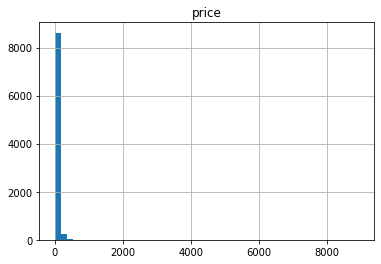

In [11]:
data.hist(column = 'price', bins = 50)

array([[&lt;AxesSubplot:title={&#39;center&#39;:&#39;price&#39;}&gt;]], dtype=object)

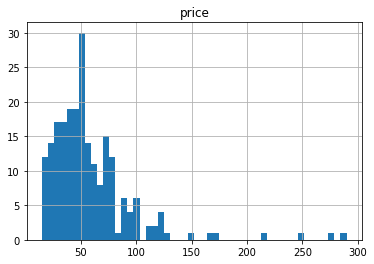

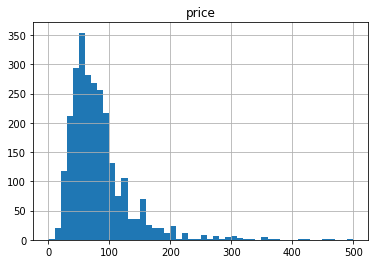

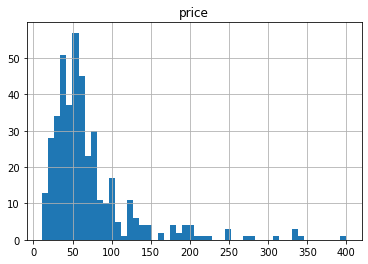

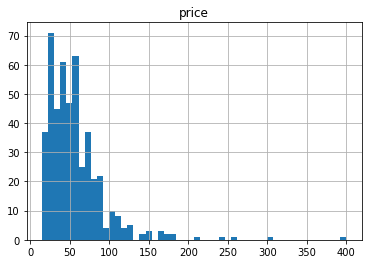

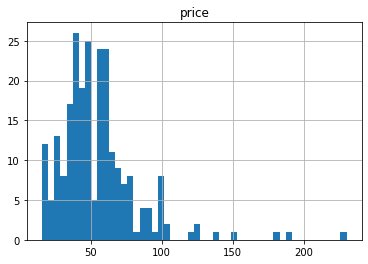

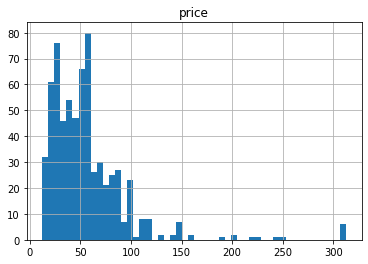

In [9]:
data.query('neighbourhood == "Molenbeek-Saint-Jean" & price < 500').hist(column = 'price', bins = 50)
data.query('neighbourhood == "Bruxelles" & price < 500').hist(column = 'price', bins = 50)
data.query('neighbourhood == "Uccle" & price < 500').hist(column = 'price', bins = 50)
data.query('neighbourhood == "Forest" & price < 500').hist(column = 'price', bins = 50)
data.query('neighbourhood == "Saint-Josse-ten-Noode" & price < 500').hist(column = 'price', bins = 50)
data.query('neighbourhood == "Schaerbeek" & price < 500').hist(column = 'price', bins = 50)